In [1]:
# Importing all the modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

In [3]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [7]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
134     6
104     6
94      5
85      5
74      5
168     5
65      5
95      5
103     5
102     5
122     4
148     4
118     4
106     4
93      4
125     3
83      3
154     3
137     3
115     3
101     3
119     2
197     2
194     2
145     2
129     2
89      2
164     2
188     2
113     2
87      2
158     2
81      2
192     2
108     2
110     2
153     2
107     1
256     1
231     1
98      1
186     1
142     1
90      1
78      1
77      1
121     1
Name: normalized-losses, dtype: int64

In [8]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
101     6
62      6
88      6
114     6
82      5
84      5
102     5
76      5
97      5
145     5
111     4
92      4
123     4
86      4
182     3
152     3
207     3
85      3
121     3
73      3
90      3
176     2
184     2
156     2
112     2
162     2
100     2
52      2
94      2
56      2
161     2
?       2
155     2
120     1
175     1
135     1
58      1
78      1
64      1
288     1
134     1
106     1
200     1
60      1
48      1
143     1
140     1
115     1
72      1
142     1
154     1
55      1
262     1
Name: horsepower, dtype: int64

In [9]:
# Step1 - use replace
df['normalized-losses'].replace("?", np.nan, inplace=True)
df['horsepower'].replace("?", np.nan, inplace=True)

# Step2 - change the datatyppe to float
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')

#Step3 - calculate the mean value of the cols
nmean = df['normalized-losses'].mean()
nmean = df['horsepower'].mean()

# Step4 - use fillna
df['normalized-losses'].fillna(nmean, inplace=True)
df['horsepower'].fillna(nmean, inplace=True)

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,104.256158,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,104.256158,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,104.256158,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.000000,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.000000,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


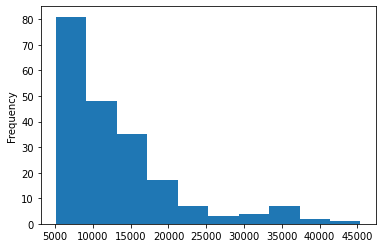

In [12]:
df.price.plot(kind='hist',)

In [13]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.439257,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.439257,1.000000,0.018863,-0.352795,0.013880,0.109015,-0.143005,-0.103949,0.032288
width,-0.232919,0.018863,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.352795,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.013880,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.109015,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.143005,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.103949,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.032288,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


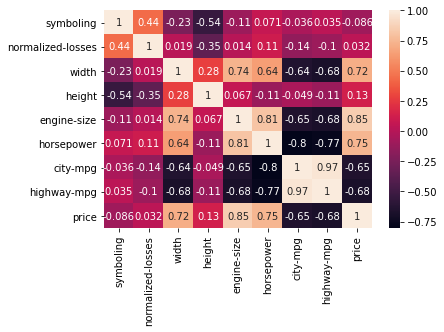

In [14]:
sns.heatmap(df.corr(), annot=True)

# Outliers

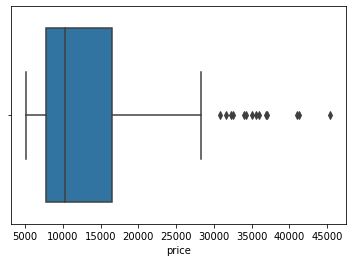

In [15]:
sns.boxplot(df['price'])

In [16]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

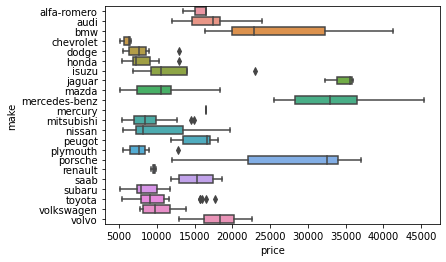

In [17]:
sns.boxplot(data=df, x='price', y='make')

In [18]:
# Dodge
df[(df['make'] == 'dodge') & (df['price'] > 10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [19]:
df.drop(29, inplace= True)

In [20]:
# Honda
df[(df['make'] == 'honda') & (df['price'] > 11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [21]:
df.drop(41, inplace = True)

In [22]:
# isuzu
df[(df['make'] == 'isuzu') & (df['price'] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,104.256158,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [23]:
df.drop(45, inplace=True)

In [63]:
#Toyoto
df[(df['make'] == 'toyoto') & (df['price'] > 14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price


In [25]:
#mitsubishi
df[(df['make'] == 'mitsubishi') & (df['price'] > 13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,104.256158,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,104.256158,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [26]:
df.drop([83,84],inplace=True)

In [27]:
# plymouth
df[(df['make'] == 'plymouth') & (df['price'] > 10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,104.256158,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [28]:
df.drop(124, inplace=True)

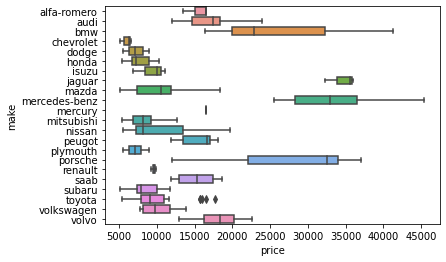

In [29]:
sns.boxplot(data=df, x='price', y='make')

# Encoding

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    float64
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   body-style         199 non-null    object 
 5   drive-wheels       199 non-null    object 
 6   engine-location    199 non-null    object 
 7   width              199 non-null    float64
 8   height             199 non-null    float64
 9   engine-type        199 non-null    object 
 10  engine-size        199 non-null    int64  
 11  horsepower         199 non-null    float64
 12  city-mpg           199 non-null    int64  
 13  highway-mpg        199 non-null    int64  
 14  price              199 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 34.9+ KB


In [55]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['int64','float64'])

In [56]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [57]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,104.256158,64.1,48.8,130,111.0,21,27,13495
1,3,104.256158,64.1,48.8,130,111.0,21,27,16500
2,1,104.256158,65.5,52.4,152,154.0,19,26,16500
3,2,164.000000,66.2,54.3,109,102.0,24,30,13950
4,2,164.000000,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.000000,68.9,55.5,141,114.0,23,28,16845
201,-1,95.000000,68.8,55.5,141,160.0,19,25,19045
202,-1,95.000000,68.9,55.5,173,134.0,18,23,21485
203,-1,95.000000,68.9,55.5,145,106.0,26,27,22470


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [60]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [61]:
df_new = pd.concat([df_cat, df_num], axis=1)

In [62]:
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,104.256158,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,104.256158,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,104.256158,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.000000,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.000000,66.4,54.3,136,115.0,18,22,17450


# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
for col in df_new:
    sc= StandardScaler()
    df_new[col]=sc.fit_transform(df_new[[col]])

In [41]:
df_new

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.957388,0.334263,-3.034166,1.196306,-0.123718,-2.823287,1.804809,-0.444262,-0.838562,-2.068392,0.081390,0.186629,-0.659336,-0.560608,0.040924
1,-1.957388,0.334263,-3.034166,1.196306,-0.123718,-2.823287,1.804809,-0.444262,-0.838562,-2.068392,0.081390,0.186629,-0.659336,-0.560608,0.417982
2,-1.957388,0.334263,-0.720760,1.196306,-0.123718,1.858664,0.164823,-0.444262,-0.191764,-0.579898,0.606947,1.274873,-0.966975,-0.706631,0.417982
3,-1.798335,0.334263,0.435943,-0.593656,-0.123718,-0.014116,0.984816,1.384314,0.131635,0.205696,-0.420277,-0.041143,-0.197878,-0.122541,0.098016
4,-1.798335,0.334263,0.435943,-2.383618,-0.123718,-0.014116,0.984816,1.384314,0.224034,0.205696,0.224724,0.287861,-1.120795,-1.290720,0.537185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.382720,0.334263,0.435943,1.196306,-0.123718,-0.014116,-1.475163,-0.727565,1.379031,0.701861,0.344169,0.262553,-0.351698,-0.414586,0.461272
201,1.382720,0.334263,0.435943,1.196306,-0.123718,-0.014116,-1.475163,-0.727565,1.332831,0.701861,0.344169,1.426721,-0.966975,-0.852653,0.737321
202,1.382720,0.334263,0.435943,1.196306,-0.123718,1.858664,-1.475163,-0.727565,1.379031,0.701861,1.108615,0.768713,-1.120795,-1.144698,1.043485
203,1.382720,-2.991655,0.435943,1.196306,-0.123718,-0.014116,-1.475163,-0.727565,1.379031,0.701861,0.439724,0.060089,0.109761,-0.560608,1.167080


In [42]:
x = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=101)

# model Creation

In [44]:
models =[]

models.append(('LR    ', LinearRegression()))
models.append(("DT    ", DecisionTreeRegressor()))
models.append(("SVM_L ", SVR(kernel='linear')))
models.append(("SVM-r ", SVR(kernel='rbf')))
models.append(("RT    ", RandomForestRegressor()))

for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f"{name} -: {r2_score(ytest,ypred)}")

LR     -: 0.7702026432628108
DT     -: 0.9043833635157231
SVM_L  -: 0.773593649748009
SVM-r  -: 0.8774924238952048
RT     -: 0.9231719826818554


# Hyperparameter tuning

In [45]:
def create_model(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(r2_score(ytest, ypred))
    return model

In [46]:
for i in range(2,10):
    models = DecisionTreeRegressor(max_depth=i)
    print(i)
    create_model(models)
    

2
0.7989113239949394
3
0.8672978024915294
4
0.8809815126299121
5
0.9025039810393984
6
0.8887327214626833
7
0.9125423397592562
8
0.8656620634763477
9
0.9029141919985498


In [47]:
dt = DecisionTreeRegressor(max_depth=9)
create_model(dt)

0.9118481420614741


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
for i in range(2,15):
    models = DecisionTreeRegressor(min_samples_leaf=i)
    print(i)
    create_model(models)
    

2
0.880199970007711
3
0.8545219471738236
4
0.8617445811944457
5
0.8753839571368467
6
0.8929305016036087
7
0.9019425132286073
8
0.8845271397696791
9
0.8842030168280468
10
0.8851787116755121
11
0.8850419199701588
12
0.8857935416024112
13
0.6058496211211224
14
0.6297444322843416


In [49]:
dt1 = DecisionTreeRegressor(min_samples_leaf=7)
create_model(dt1)

0.9019425132286073


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
for i in range(2,10):
    models = SVR(degree=i)
    print(i)
    create_model(models)
    

2
0.8774924238952048
3
0.8774924238952048
4
0.8774924238952048
5
0.8774924238952048
6
0.8774924238952048
7
0.8774924238952048
8
0.8774924238952048
9
0.8774924238952048


In [51]:
sc = SVR(degree=5)
create_model(sc)

0.8774924238952048


SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
for i in range(2,15):
    models = RandomForestRegressor(n_estimators=i)
    print(i)
    create_model(models)
    

2
0.8740285396835857
3
0.8946048539353463
4
0.9230047186305572
5
0.9217739952674808
6
0.9151887889075456
7
0.9135267402646061
8
0.9260856562988682
9
0.912836044713106
10
0.9217802322913484
11
0.9202721275456985
12
0.9035440026921604
13
0.916968590165064
14
0.914969434418697


In [53]:
rf = RandomForestRegressor(n_estimators=13)
create_model(rf)

0.9111588334337719


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=13, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)